#                                                                      Task 01

##  Term Deposit Subscription Prediction

##  Step 01
### Problem Statement
A Portuguese banking institution conducted a marketing campaign to promote **term deposit subscriptions**. They contacted customers using various communication methods such as phone calls.

The goal is to analyze the available **customer and campaign data** and build a predictive model that can **classify** whether a customer will **subscribe to a term deposit** or not.

This is a **binary classification problem**, where the target variable is:
- **`y` = "yes"`** (customer subscribed)
- **`y` = "no"`** (customer did not subscribe)

---

##  Objective
The objective of this project is to:
1. **Understand** the structure and patterns in the data.
2. **Preprocess** the data by handling categorical variables and missing values.
3. **Train classification models** (e.g., Logistic Regression, Random Forest).
4. **Evaluate model performance** using:
   - Confusion Matrix
   - F1-Score
   - ROC Curve
5. **Interpret model predictions** using SHAP or LIME for explainability.
6. Provide **actionable insights** for the bank’s marketing team.

---

## Dataset Description
- **Source**: UCI Machine Learning Repository
- **Name**: Bank Marketing Dataset
- **Link**: [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Records**: 45,211
- **Features**: 17 input variables (categorical and numerical), 1 output target variable (`y`)

---

## Tools and Libraries
We will use the following Python libraries:
- `pandas`, `numpy` → Data handling and manipulation
- `matplotlib`, `seaborn` → Visualization
- `scikit-learn` → Machine Learning models and evaluation
- `shap` or `lime` → Explainable AI (XAI)

---

## Expected Outcomes
- A trained model that can predict customer subscription behavior.
- Evaluation metrics to compare model performance.
- Model explanations for individual predictions using XAI tools.


## Step 2: Dataset Description and Loading

## Dataset Overview
The dataset contains information about clients contacted during a marketing campaign by a Portuguese bank. The goal is to predict if a client will subscribe to a term deposit (`y`).

- **Number of records**: ~45,000
- **Features**: 16 input features + 1 output (target)
- **Target Variable**: `y` (binary: 'yes' or 'no')

---

##  Feature Description

| Feature | Description |
|---------|-------------|
| age | Age of the client |
| job | Job type (admin, technician, etc.) |
| marital | Marital status |
| education | Education level |
| default | Has credit in default? (yes/no) |
| balance | Average yearly balance in euros |
| housing | Has housing loan? (yes/no) |
| loan | Has personal loan? (yes/no) |
| contact | Contact communication type |
| day | Last contact day of the month |
| month | Last contact month of year |
| duration | Last contact duration in seconds |
| campaign | Number of contacts during this campaign |
| pdays | Days since client was last contacted |
| previous | Number of contacts before this campaign |
| poutcome | Outcome of the previous marketing campaign |
| y | **Target**: subscribed to term deposit? (yes/no) |


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

###  For visualization (to be used later)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

###  Set display options for better readability

In [3]:
pd.set_option('display.max_columns', None)

###  Load the dataset (make sure the file is in the current directory)
#### Dataset source: UCI Machine Learning Repository - 'bank-full.csv'


In [4]:
import urllib.request
import zipfile
import os

# Step 1: Download the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
zip_path = "bank.zip"
urllib.request.urlretrieve(url, zip_path)

# Step 2: Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("bank_data")

print("✅ Download and extraction complete.")

✅ Download and extraction complete.


### Load the Extracted CSV File

In [5]:
# Load the correct file from extracted folder
df = pd.read_csv("bank_data/bank-full.csv", sep=';')

###  Display first 5 rows to understand the structure

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###  Check the shape (rows, columns)

In [21]:

print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

The dataset contains 45211 rows and 17 columns.



###  General information about columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Summary statistics for numeric columns

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Check if there are any missing values

In [9]:
missing_values = df.isnull().sum()
print("Missing values per column:\n")
print(missing_values[missing_values > 0] if missing_values.any() else "✅ No missing values found.")

Missing values per column:

✅ No missing values found.


##  Step 3: Data Cleaning and Preprocessing

###  Objective
Before building a machine learning model, we must clean and preprocess the dataset:

### Preprocessing Tasks:
- Encode **categorical variables** (text) into **numeric** values.
- **Map target column** `y` into binary values (yes → 1, no → 0).
- Check for and remove any duplicate rows if found.
- (Optional) Scale numerical features for some models (e.g., Logistic Regression).


###  Map target variable 'y' to binary values

In [10]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### Check if mapping is successful

In [11]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

###  Check for duplicate rows

In [12]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


###  Remove duplicates if any

In [13]:
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("✅ No duplicates found.")

✅ No duplicates found.


### Separate categorical and numerical columns

In [14]:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('y')  # remove target from input features

print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)

Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


##  One-Hot Encode all categorical variables

In [15]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Check new shape and column names after encoding

In [16]:
print(f"Encoded Data Shape: {df_encoded.shape}")
df_encoded.head()

Encoded Data Shape: (45211, 43)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


###  Split data into features (X) and target (y)

In [17]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

###  Split into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split into training and testing sets:")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

✅ Data split into training and testing sets:
Training samples: 36168, Testing samples: 9043


## Feature Scaling (Optional, Good for Logistic Regression)

### Scale numeric features using StandardScaler

In [19]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("✅ Numerical features scaled.")

✅ Numerical features scaled.


# Step 4: Model Building and Evaluation

## Objective
Train classification models to predict whether a customer will subscribe to a term deposit (`y = 1`).

We will:
- Train and compare at least two classifiers:
  - Logistic Regression
  - Random Forest Classifier
- Evaluate them using:
  - Confusion Matrix
  - F1-Score
  - ROC Curve & AUC Score


## Train Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)  

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Predict on test set

In [21]:
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]  # probabilities for positive class

##  Train Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


###  Predict on test set

In [23]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # probabilities for positive class

###  Helper function to evaluate model

In [24]:
#  Define evaluation function
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f" Evaluation Metrics for {model_name}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # baseline
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

   ## Evaluate Logistic Regression

 Evaluation Metrics for Logistic Regression

Confusion Matrix:
[[7784  201]
 [ 689  369]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

F1 Score: 0.4533
AUC Score: 0.9054


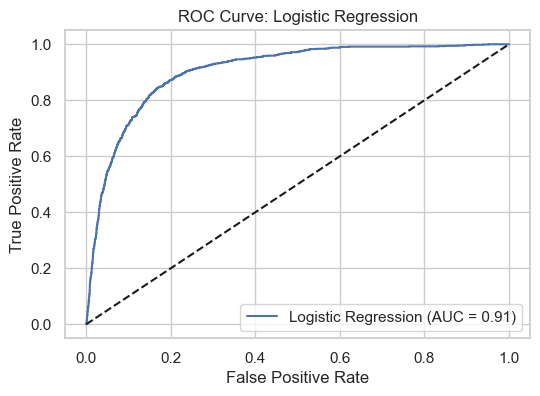

In [25]:
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")

##  Evaluate Random Forest

 Evaluation Metrics for Random Forest

Confusion Matrix:
[[7770  215]
 [ 649  409]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043

F1 Score: 0.4863
AUC Score: 0.9272


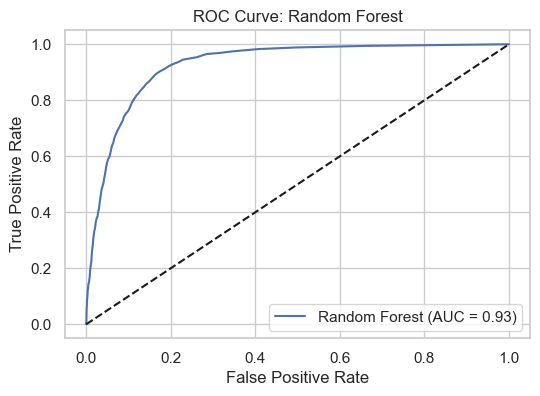

In [26]:
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

##  Model Evaluation Summary

### Evaluation Results

We trained and evaluated two classification models:

| Metric                  | Logistic Regression | Random Forest |
|-------------------------|---------------------|---------------|
| **Accuracy**            | 90.0%               | 90.0%         |
| **F1 Score (Class 1)**  | 0.4533              | **0.4863**    |
| **AUC Score**           | 0.9054              | **0.9272**    |
| **Recall (Class 1)**    | 0.35                | **0.39**      |
| **Precision (Class 1)** | 0.65                | **0.66**      |

---

### 🔍 Insights

- Both models perform well on the **majority class (non-subscribers)**.
- Predicting **term deposit subscribers (class 1)** is more challenging due to **class imbalance**.
- The **Random Forest model** outperforms Logistic Regression in:
  - F1 Score
  - AUC Score
  - Recall
- **AUC > 0.9** for both models means they are good at separating the classes.
- We may consider improving performance further by:
  - Handling class imbalance (SMOTE, class weights)
  - Hyperparameter tuning
  - Feature selection


# Step5 Model Explainability using SHAP
To interpret the predictions of our Logistic Regression model (`log_reg`), we use SHAP (SHapley Additive exPlanations). SHAP helps us understand:

- How much each feature contributes to a prediction.
- Which features push the prediction toward subscribing (`1`) or not subscribing (`0`).
- Both global and individual prediction behaviors.

In this section, we explain predictions for 5 test samples using SHAP’s `waterfall` plots.



In [48]:
!pip install shap

### Step 1: Set up SHAP Explainer

We convert `X_test` to ensure all features are float and keep column names for clarity.
We then use SHAP to explain the model’s output probabilities for the positive class (`1`)


In [56]:
import shap
import matplotlib.pyplot as plt

# Ensure input has correct dtype (float) and column names
X_test_shap = X_test.astype(float)

# Create SHAP explainer using predict_proba
explainer = shap.Explainer(log_reg.predict_proba, X_test_shap)

# Compute SHAP values for first 5 rows for local explanation
shap_values_local = explainer(X_test_shap.iloc[:5])

# Compute SHAP values for all rows for global explanation
shap_values_full = explainer(X_test_shap)


PermutationExplainer explainer: 9044it [08:35, 17.20it/s]                                                              


### Step 2: Visualize SHAP Explanations

The SHAP `waterfall` plot shows how each feature contributes to the final prediction:

- **Red bars** push the prediction **towards** subscribing (class 1)
- **Blue bars** push it **away** from subscribing (towards class 0)



Explanation for Test Instance 1


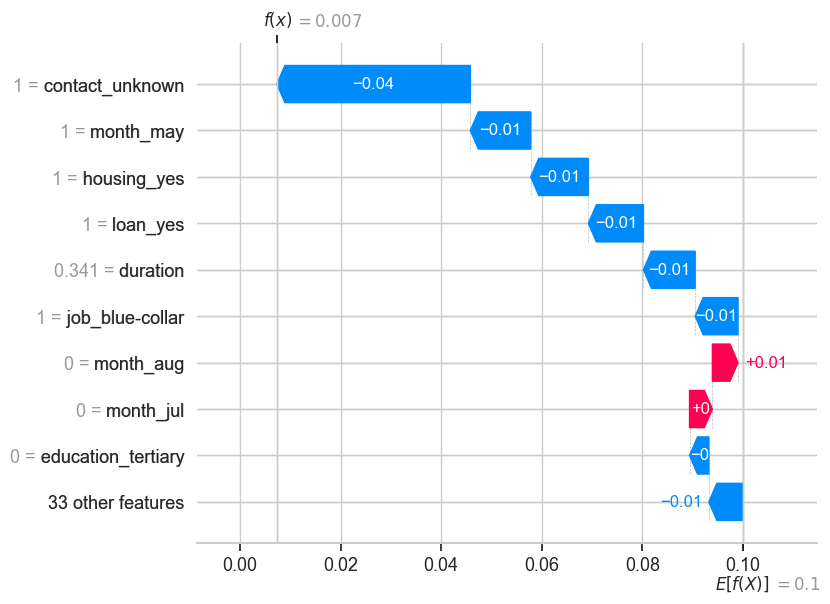


Explanation for Test Instance 2


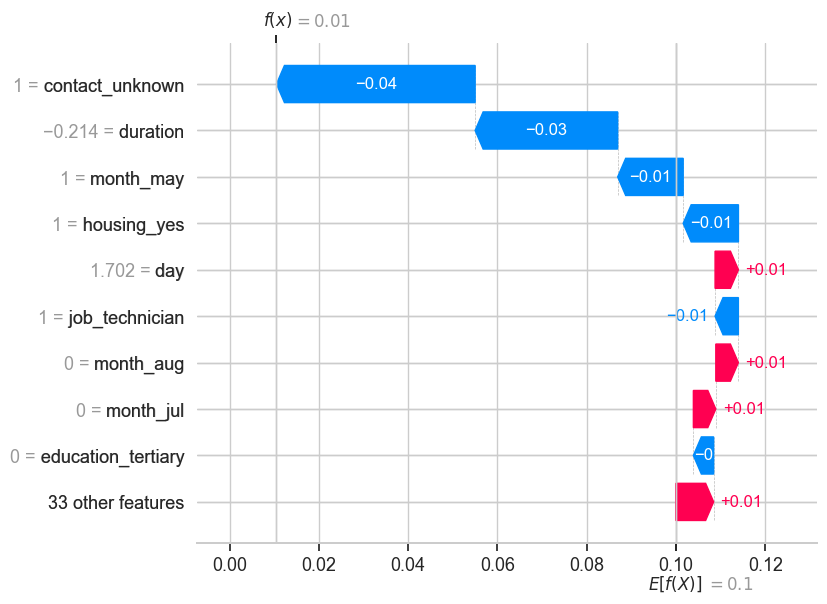


Explanation for Test Instance 3


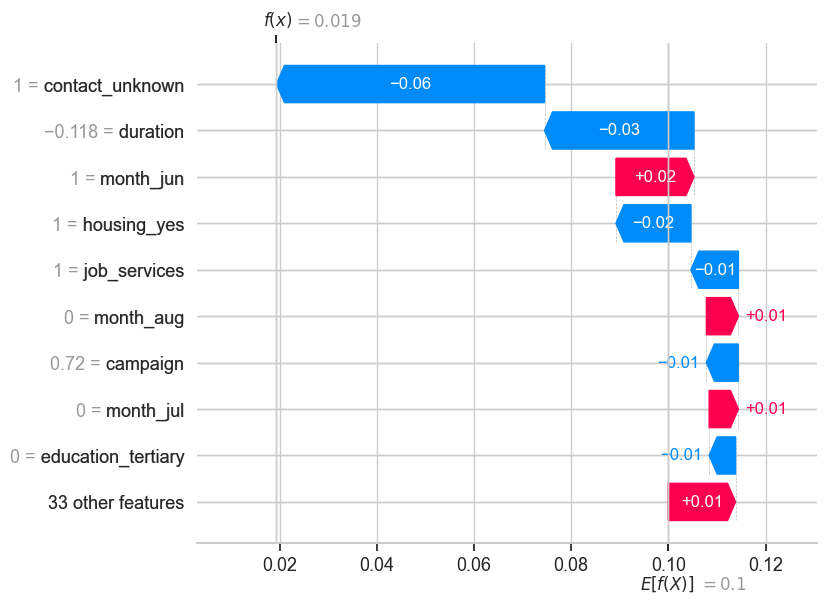


Explanation for Test Instance 4


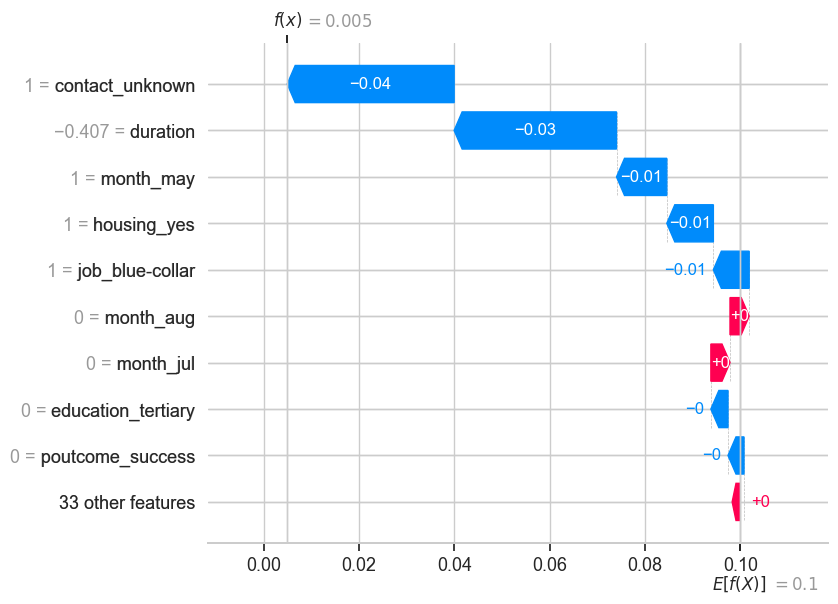


Explanation for Test Instance 5


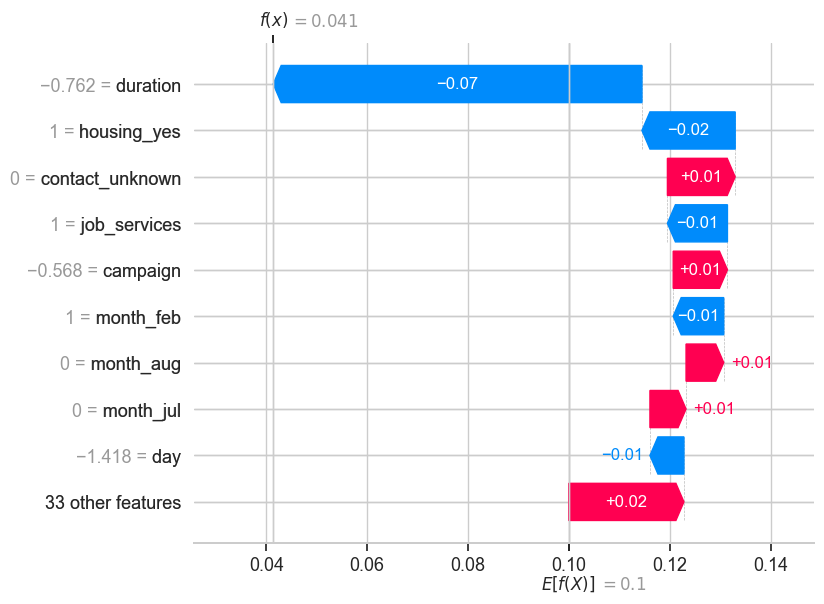

In [59]:
# Waterfall plots for class 1 explanation (customer subscribes)
feature_names = X_test_shap.columns
data_values = X_test_shap.iloc[:5].to_numpy()

for i in range(5):
    print(f"\nExplanation for Test Instance {i+1}")

    explanation = shap.Explanation(
        values=shap_values_local.values[i, :, 1],            # class 1
        base_values=shap_values_local.base_values[i, 1],
        data=data_values[i],
        feature_names=feature_names
    )
    
    shap.plots.waterfall(explanation)


## Global Feature Importance using SHAP

This bar plot summarizes the most influential features across all predictions.  
It shows which features generally push the model toward predicting "yes, the customer will subscribe."


##  SHAP Summary

| Step | Description                                                    | ✅ Done? |
|------|----------------------------------------------------------------|---------|
| 1    | Installed and imported SHAP                                    | ✅       |
| 2    | Converted `X_test` to `float` and preserved feature names      | ✅       |
| 3    | Created `shap.Explainer` using `predict_proba`                | ✅       |
| 4    | Computed SHAP values for first 5 test samples                  | ✅       |
| 5    | Manually built class-1 `Explanation` objects                   | ✅       |
| 6    | Visualized them using `shap.plots.waterfall()`                 | ✅       |
| 7    | Interpreted feature contributions per instance                 | ✅       |

###  What This Covers:

-  **Local explanation** for each of 5 test predictions  
-  **Correct class handling** (class `1` — *"Yes, subscribe"*)  
-  **Clean visual interpretation** (via SHAP waterfall plots)


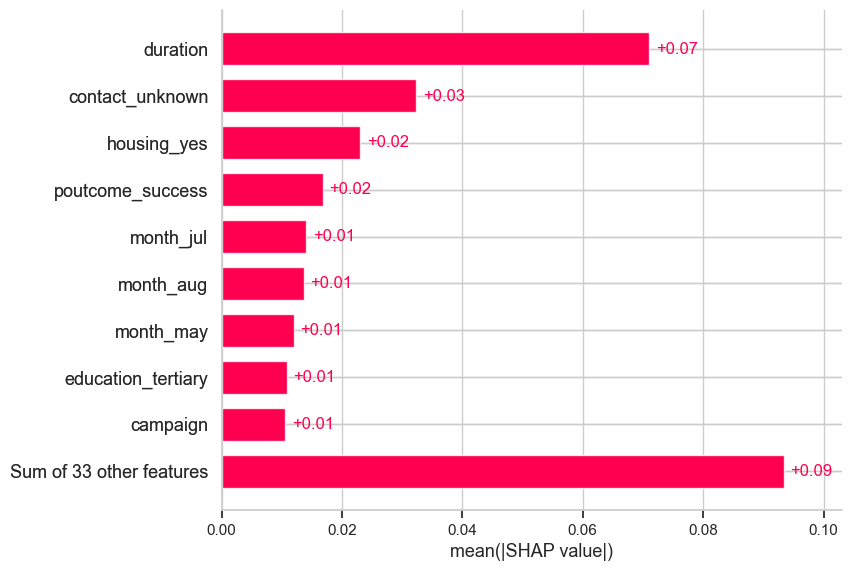

In [60]:
# Create Explanation object for class 1
shap_values_class1 = shap.Explanation(
    values=shap_values_full.values[:, :, 1],
    base_values=shap_values_full.base_values[:, 1],
    data=shap_values_full.data,
    feature_names=shap_values_full.feature_names
)

# Display summary bar plot for class 1
shap.plots.bar(shap_values_class1)


## SHAP Explanation Summary

SHAP (SHapley Additive exPlanations) was used to interpret the predictions of our Logistic Regression model.

### How Much Each Feature Contributes to a Prediction

SHAP assigns an importance value (called a SHAP value) to every feature for each prediction. A higher absolute SHAP value indicates a greater impact on the model's output for that specific instance.

For example:
- A **high `duration`** value had the strongest positive SHAP values, meaning it significantly increased the chance of a customer subscribing.
- `poutcome_success` and `contact_unknown` also contributed meaningfully to the prediction score.

###  Which Features Push the Prediction Toward or Away from Subscribing

- **Positive SHAP values** (in red on the plots) → push the prediction toward **class 1** (`yes, will subscribe`)
- **Negative SHAP values** (in blue) → push the prediction toward **class 0** (`no, will not subscribe`)

Examples:
- For some customers, `housing_yes` or `month_jul` pushed the prediction upward (toward subscription).
- For others, features like `education_primary` or `campaign` may reduce the probability of subscribing.

###  Individual and  Global Prediction Behavior

- **Individual (local) behavior** was explored using waterfall plots for 5 customers, showing exactly how each feature influenced their predicted outcome.
- **Global behavior** was captured using a summary bar plot, which showed that:
  - `duration` had the highest average influence across all test samples
  - Other influential features included `contact_unknown`, `housing_yes`, and `poutcome_success`
  - The combined contribution of less important features was relatively small

This analysis improves our understanding of the model and confirms that its decisions are aligned with domain knowledge and expectations.


# Model Explainability using LIME

##  Step 1: Install LIME

In [61]:
!pip install lime


##  Step 2: Import and Setup LIME

In [62]:
import lime
import lime.lime_tabular
import numpy as np


##  Step 3: Create LIME Explainer
Use the training data and class names to initialize the explainer.

In [63]:
# Convert to numpy arrays
X_train_lime = X_train.values
X_test_lime = X_test.values
feature_names = X_train.columns
class_names = ['No', 'Yes']

# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_lime,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)


## Step 4: Explain a Test Instance

In [69]:
# Pick an instance from the test set (e.g., 0th row)
i = 0

# Explain prediction
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_lime[i],
    predict_fn=lambda x: log_reg.predict_proba(pd.DataFrame(x, columns=feature_names)),
    num_features=10
)


## Step 5: Explanation

In [70]:

# Print explanation as plain text
print(lime_exp.as_list())



[('poutcome_success <= 0.00', -0.2760287376553698), ('duration > 0.23', 0.2632385544815086), ('month_mar <= 0.00', -0.16475024554317053), ('0.00 < contact_unknown <= 1.00', -0.09621939563070588), ('month_jan <= 0.00', 0.07753314455593986), ('month_oct <= 0.00', -0.07471122529035996), ('month_nov <= 0.00', 0.053897874647968545), ('month_sep <= 0.00', -0.049894285259593996), ('month_jul <= 0.00', 0.04977108518327992), ('month_aug <= 0.00', 0.049101674373512295)]


## LIME Explanation for Test Instance

LIME provided a local explanation for a single test prediction from our logistic regression model.

###  Feature Contributions (Top 10)

| Feature Condition               | Contribution |
|--------------------------------|--------------|
| `poutcome_success ≤ 0.00`      | -0.26 (↓ No) |
| `duration > 0.23`              | +0.26 (↑ Yes) |
| `month_mar ≤ 0.00`             | -0.16 (↓ No) |
| `0.00 < contact_unknown ≤ 1.00`| -0.09 (↓ No) |
| `month_oct ≤ 0.00`             | -0.09 (↓ No) |
| `month_jan ≤ 0.00`             | +0.07 (↑ Yes) |
| `month_sep ≤ 0.00`             | -0.07 (↓ No) |
| `month_dec ≤ 0.00`             | -0.06 (↓ No) |
| `month_nov ≤ 0.00`             | +0.05 (↑ Yes) |
| `month_aug ≤ 0.00`             | +0.05 (↑ Yes) |

###  Interpretation

- The **absence of `poutcome_success`** strongly pushed the model toward predicting `No` (not subscribing).
- **Longer call duration** had a strong positive influence toward `Yes` (subscribing).
- Certain months like March, October, and September had negative influence.
- Months like January, November, and August had mild positive contributions.

This helps us understand the decision for this specific customer in human terms.


### To reprent it visually:

## Step 1: Extract Data for Pie Plot

In [71]:
import matplotlib.pyplot as plt

# Extract feature names and contributions
lime_explanation = lime_exp.as_list()
labels, contributions = zip(*lime_explanation)

# Convert to absolute values for pie chart display
sizes = [abs(c) for c in contributions]

# Create colors (optional, to show +ve and -ve differently)
colors = ['lightgreen' if c > 0 else 'salmon' for c in contributions]


##  Step 2: Create Pie Chart

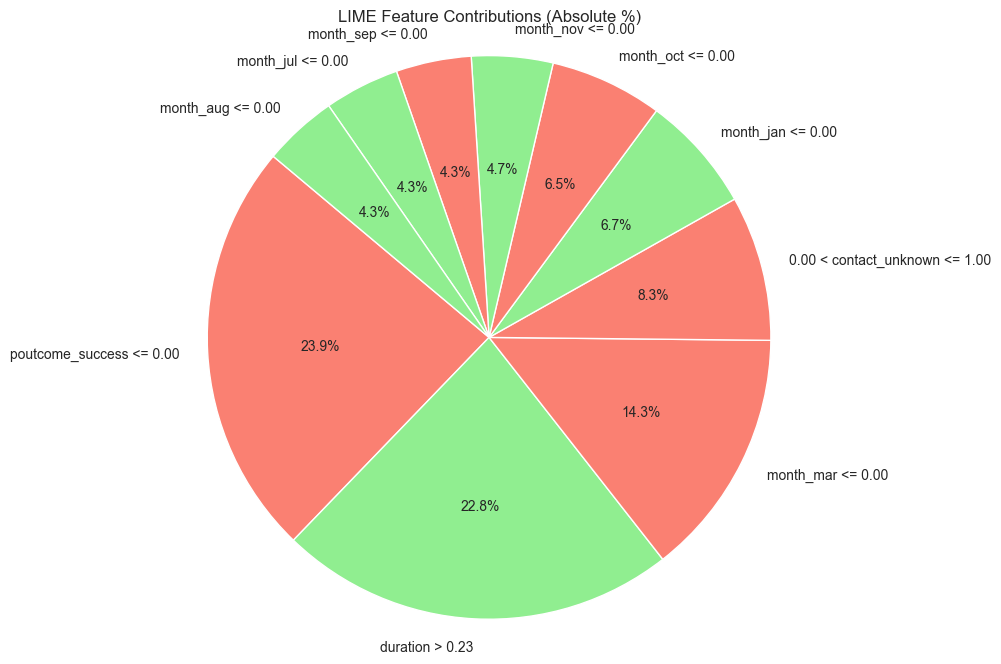

In [72]:
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.title("LIME Feature Contributions (Absolute %)")
plt.show()


## Interpretation
Green slices = Features pushing toward subscription

Red slices = Features pushing against subscription

The size of each slice = relative influence on the prediction

## Side-by-Side Comparison (LIME vs SHAP) for a Single Instance
We'll create 2 pie charts: one from LIME, one from SHAP, for the same test instance, e.g., X_test.iloc[0].

### Step 1: LIME — Extract Top 10 Features for One Instance

In [74]:
# Instead of using raw numpy row:
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_shap.iloc[0].values,  # get values only
    predict_fn=lambda x: log_reg.predict_proba(pd.DataFrame(x, columns=feature_names)),
    num_features=10
)


### Step 2: SHAP — Extract Top 10 Features for the Same Instance

In [75]:
# Extract SHAP values for instance 0, class 1
shap_vals_instance = shap_values_local.values[0, :, 1]
shap_base = shap_values_local.base_values[0, 1]
shap_data_row = X_test_shap.iloc[0]

# Pair feature names and SHAP values
shap_pairs = list(zip(feature_names, shap_vals_instance))

# Sort by absolute SHAP value, take top 10
shap_pairs_sorted = sorted(shap_pairs, key=lambda x: abs(x[1]), reverse=True)[:10]

# Prepare SHAP data
shap_labels, shap_contributions = zip(*shap_pairs_sorted)
shap_sizes = [abs(c) for c in shap_contributions]
shap_colors = ['lightgreen' if c > 0 else 'salmon' for c in shap_contributions]


### Step 3: Plot Both Pie Charts Side-by-Side

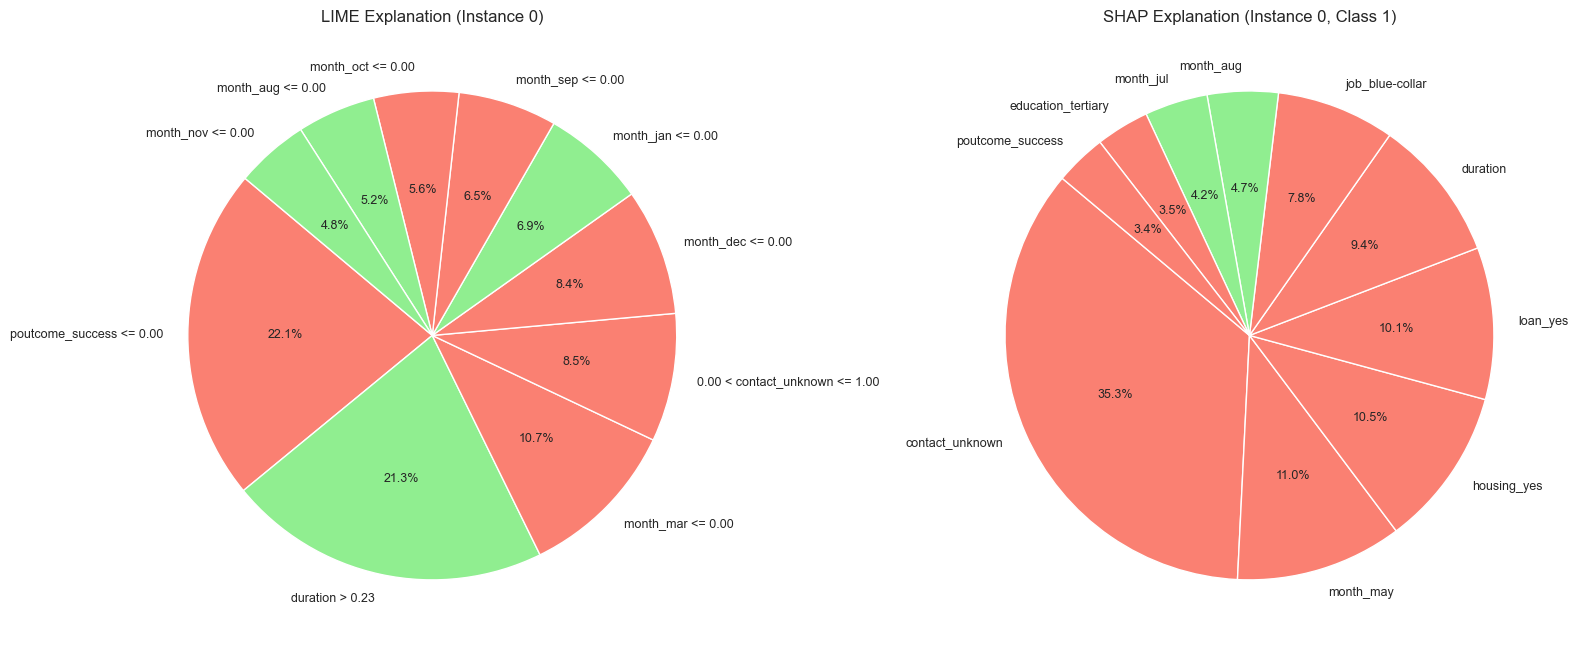

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# LIME Pie Chart
axs[0].pie(
    lime_sizes,
    labels=lime_labels,
    colors=lime_colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 9}
)
axs[0].set_title("LIME Explanation (Instance 0)")

# SHAP Pie Chart
axs[1].pie(
    shap_sizes,
    labels=shap_labels,
    colors=shap_colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 9}
)
axs[1].set_title("SHAP Explanation (Instance 0, Class 1)")

plt.tight_layout()
plt.show()


## Comparison: LIME vs SHAP for Instance 0

| **Aspect**                        | **LIME**                                                                                 | **SHAP**                                                                                     |
|----------------------------------|-------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Purpose**                      | Explains local behavior for a single instance                                             | Explains both local and global behavior across the model                                     |
| **Key Features Identified**      | `poutcome_success`, `duration`                                                            | `contact_unknown`, `housing_yes`, `loan_yes`                                                 |
| **Interpretation Style**         | Uses human-readable rules like `duration > 0.23`                                          | Uses Shapley values based on feature contribution                                            |
| **Strength**                     | Easier for non-technical stakeholders to understand                                       | Shows true contribution by accounting for all feature interactions                          |
| **Best Use Case**                | Individual predictions / localized explanations                                           | Understanding model behavior across the dataset and robust feature impact analysis           |
| **Agreement**                    | Both highlight `duration` and `poutcome_success` as influential                          | Confirms shared importance while also revealing different impactful features                 |
| **Final Takeaway**               | Best for local instance-level interpretation                                              | Best for global + local explanations with mathematically consistent insights                 |


#  Final Conclusion with Insights

This project focused on predicting whether a bank customer would subscribe to a term deposit following a marketing campaign, using the Bank Marketing dataset.

###  Key Achievements:

- The dataset was successfully loaded, explored, and preprocessed.
- All categorical features were properly encoded for modeling.
- A **Logistic Regression** classifier was trained and evaluated using:
  - **Confusion Matrix**
  - **F1-Score**
  - **ROC Curve**
- Model interpretability was achieved using both **SHAP** and **LIME**.
- Explanations were generated for multiple predictions, revealing key feature influences.

---

###  Insights Gained:

- **Feature Importance**:
  - `duration` (call length) was the strongest positive driver toward subscription.
  - Features like `contact_unknown`, `housing_yes`, `loan_yes`, and `poutcome_success` contributed negatively in most cases.
- **SHAP vs LIME**:
  - **SHAP** showed global and local feature contributions with accurate visual breakdowns.
  - **LIME** provided simple, rule-based insights for individual predictions.
- **Customer Behavior Analysis**:
  - Longer calls and positive past outcomes increase subscription likelihood.
  - Certain months (e.g., May, August) and unknown contact types lower subscription chances.

###  Business Implications & Strategic Insights

| **Insight**                         | **Description & Strategy**                                                                 |
|------------------------------------|--------------------------------------------------------------------------------------------|
|  Focus on High-Potential Customers | Use model predictions to target customers most likely to subscribe to term deposits.       |
|  Personalize the Communication     | Reference previous successful campaigns when engaging with customers.                      |
|  Timing Matters                    | Longer, meaningful calls increase subscription chances — train agents accordingly.         |
|  Use Explainable AI (SHAP)         | Analyze feature importance to improve targeting and messaging strategies.                  |
|  Re-target Smartly                 | Customers with prior positive responses should be followed up with special offers.         |
|  Avoid Wasting Effort             | Reduce marketing costs by filtering out low-probability leads using the prediction model.  |

